In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Data Exploration - Gives information about the data
df.shape
df.info()
df.describe()

In [ ]:
# Data Preprocessing
# Using the 'groupby' function with the categorical variables for additional insight
df.groupby('sex').mean()
df.groupby('smoker').mean() # medical charges for 'smoker' is higher
df.groupby('region').mean()

In [ ]:
# Data Preprocessing
df.isnull().sum()

In [ ]:
# One Hot Encoding for categorical values
df['region'].nunique()
df=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
df.head()

In [ ]:
df_2=df.drop(columns='charges')
df_2.head()

<Axes: title={'center': 'Correlation with Medical Charges'}>

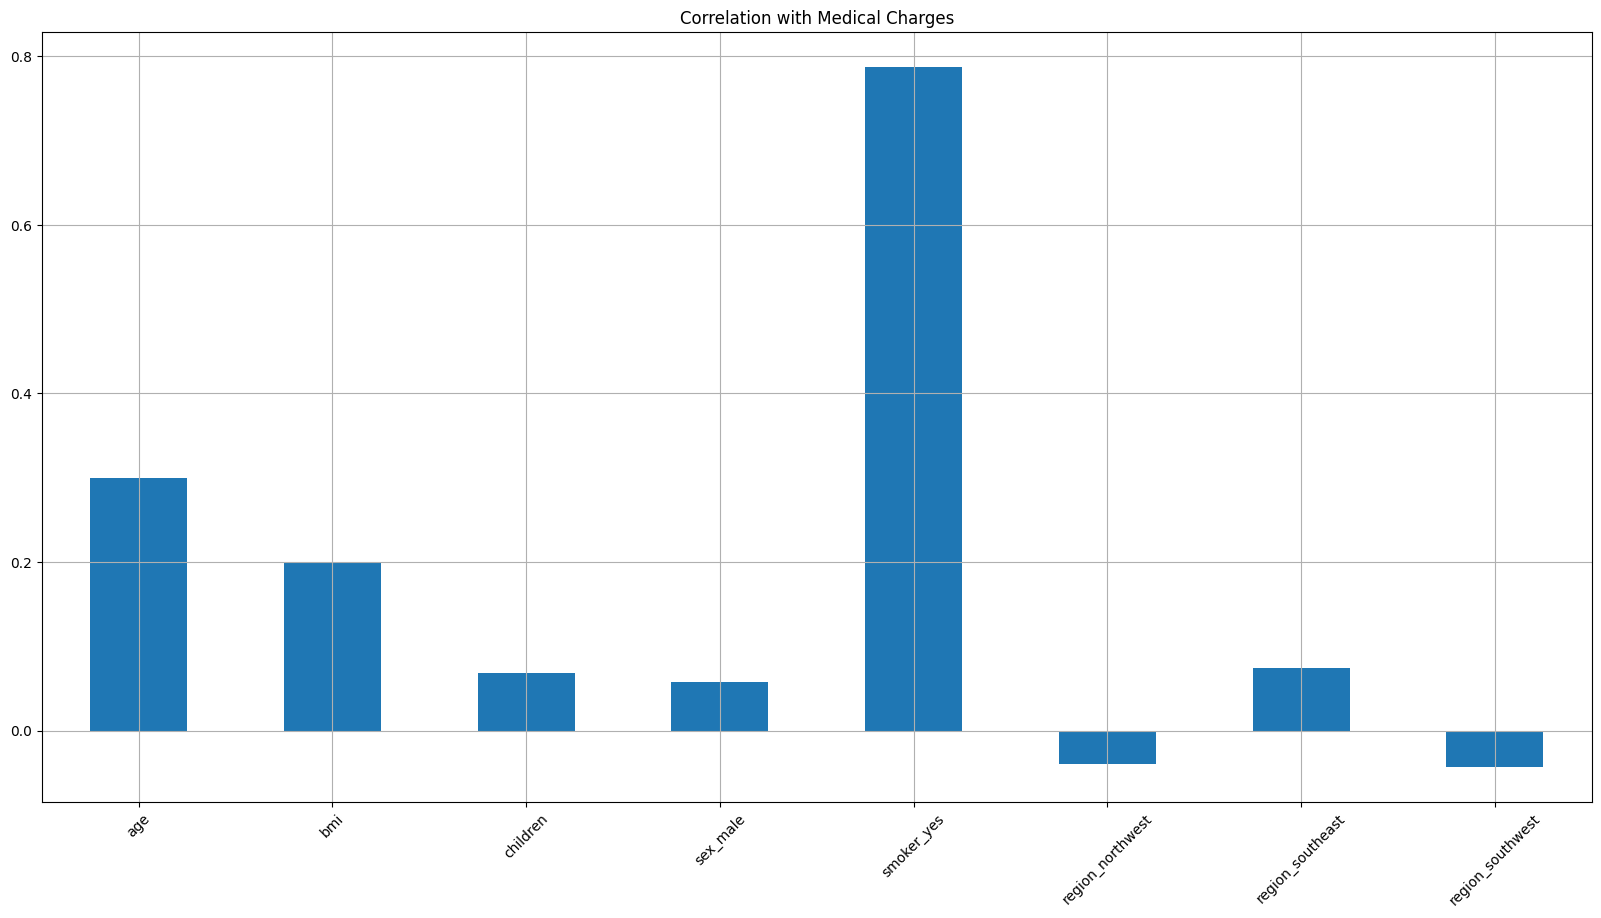

In [ ]:
df_2.corrwith(df['charges']).plot.bar(
    figsize=(20,10),title='Correlation with Medical Charges',rot=45,grid=True)

In [ ]:
# Correlation Matrix
corr=df.corr()
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<Axes: >

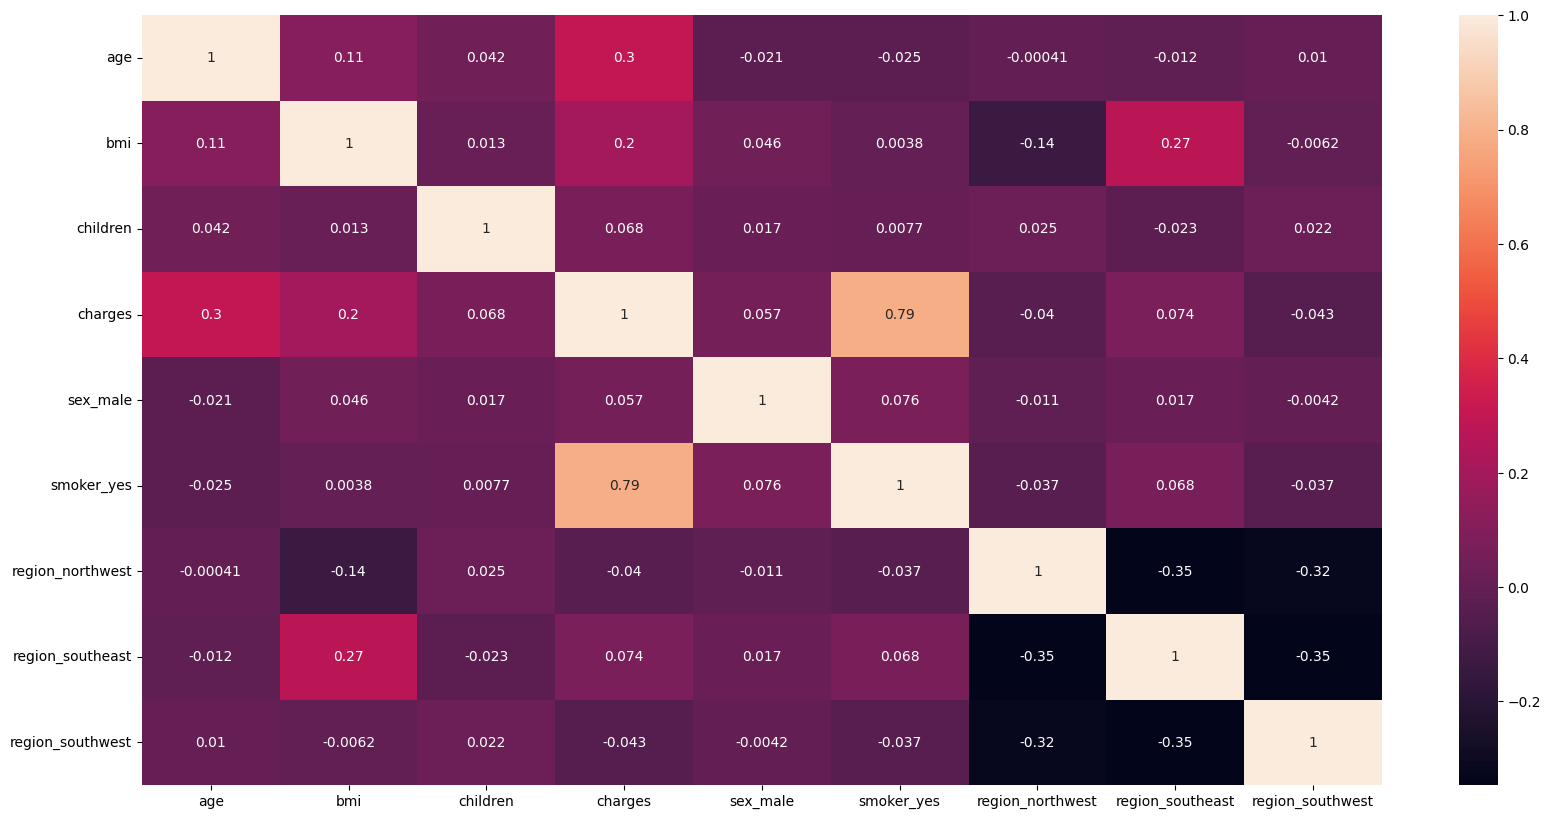

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns='charges'),df['charges'],test_size=0.2,random_state=0)

In [ ]:
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Building the model
# Method 1. Multiple Linear Regression
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [ ]:
clf.fit(X_train_scaled,Y_train)
y_pred=clf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred)
r2

In [ ]:
# Method 2. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
clf_2=RandomForestRegressor()
clf_2.fit(X_train_scaled,Y_train)
y_pred2=clf_2.predict(X_test_scaled)

In [ ]:
r2=r2_score(Y_test,y_pred2)
r2

In [ ]:
# Method 3. XGBoost Regression
from xgboost import XGBRFRegressor
clf_3=XGBRFRegressor()
clf_3.fit(X_train_scaled,Y_train)
y_pred3=clf_3.predict(X_test_scaled)

In [ ]:
r2=r2_score(Y_test,y_pred3)
r2

In [ ]:
# Predicting a single value
single_obs=[[40,45.5,4,1,1,0,0,0]]
single_obs=scaler.transform(single_obs)

In [ ]:
result=clf_3.predict(single_obs)
print("Medical Charges are :",result,"$")

In [ ]:
single_obs2=[[19,27.9,0,0,0,1,0,0]]
single_obs2=scaler.transform(single_obs2)

In [ ]:
result_2=clf_3.predict(single_obs2)
print("Medical Charges are :",result_2,"$")